In [1]:
%load_ext sql

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set()

## Histograms, KDE and Densities

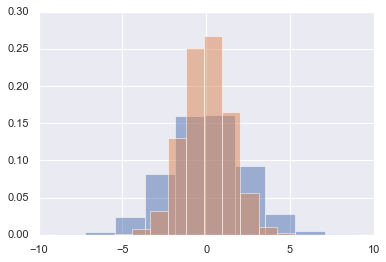

In [8]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

In [9]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)


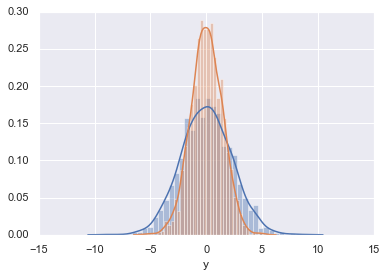

In [10]:
sns.distplot(data['x'])
sns.distplot(data['y']);

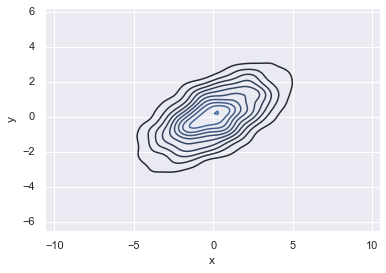

In [14]:
sns.kdeplot(data['x'],data['y']);

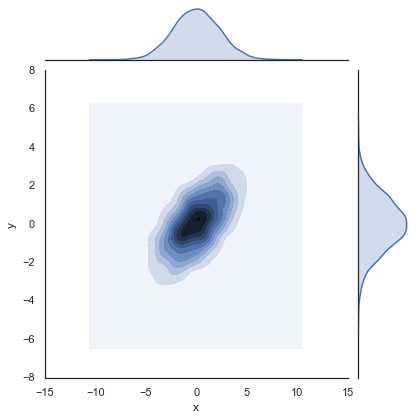

In [15]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

In [16]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

In [17]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [19]:
sns.pairplot(iris, hue='species', height=2.5);

In [20]:
tips = sns.load_dataset('tips')
tips.head()
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

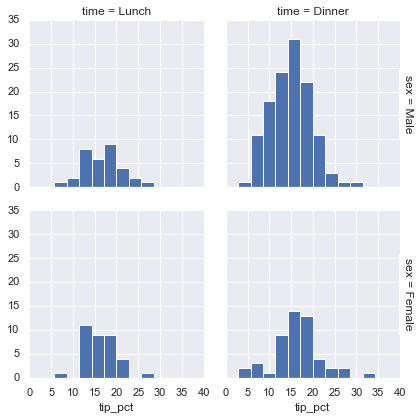

In [24]:
tips = sns.load_dataset('tips')
tips.head()
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

In [29]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  1239k      0 --:--:-- --:--:-- --:--:-- 1261k


In [30]:
import pandas as pd
data = pd.read_csv('marathon-data.csv')
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

In [39]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.Timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',converters={'split':convert_time, 'final':convert_time})
data.head()

age gender    split    final
0   33      M 01:05:38 02:08:51
1   32      M 01:06:26 02:09:28
2   31      M 01:06:49 02:10:42
3   38      M 01:06:16 02:13:45
4   31      M 01:06:32 02:13:59

In [42]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

age gender    split    final  split_sec  final_sec
0   33      M 01:05:38 02:08:51     3938.0     7731.0
1   32      M 01:06:26 02:09:28     3986.0     7768.0
2   31      M 01:06:49 02:10:42     4009.0     7842.0
3   38      M 01:06:16 02:13:45     3976.0     8025.0
4   31      M 01:06:32 02:13:59     3992.0     8039.0

In [44]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')


In [47]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

age gender    split    final  split_sec  final_sec  split_frac
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842

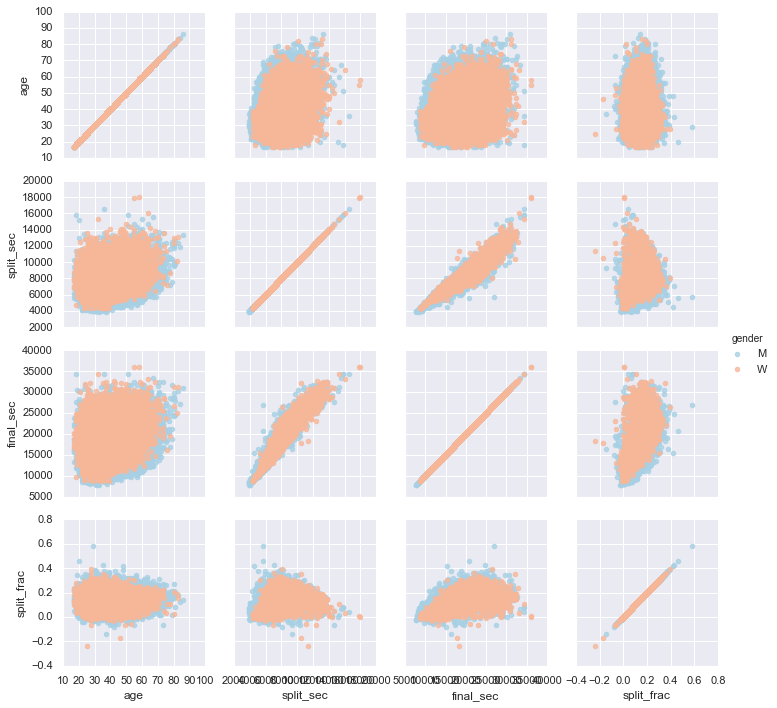

In [48]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

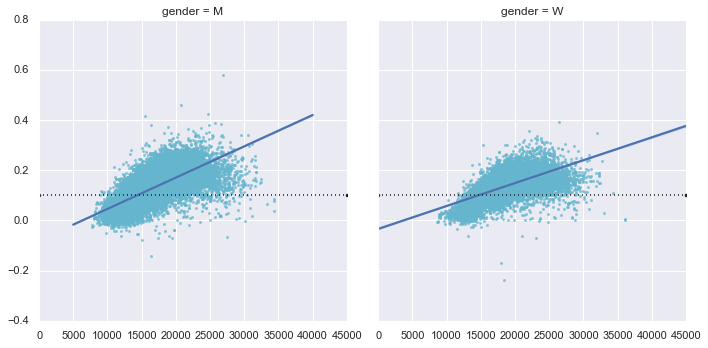

In [49]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

In [50]:
import seaborn as sns, numpy as np
sns.set(); 
np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

In [51]:
x = pd.Series(x, name="x variable")

In [52]:
ax = sns.distplot(x)

In [53]:
ax = sns.distplot(x, rug=True, hist=False)

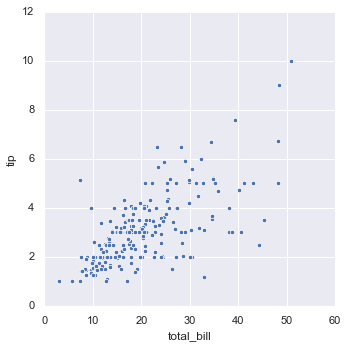

In [54]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [57]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin

In [60]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [62]:
diamonds = sns.load_dataset('diamonds')

In [63]:
type(diamonds)

pandas.core.frame.DataFrame

In [64]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [65]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [68]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [69]:
diamonds.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000